In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from scipy import stats
from sklearn.cluster import KMeans

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_json("./train.json")


In [3]:
test_df = pd.read_json("./test.json")
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])

Train Rows :  49352
Test Rows :  74659


/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


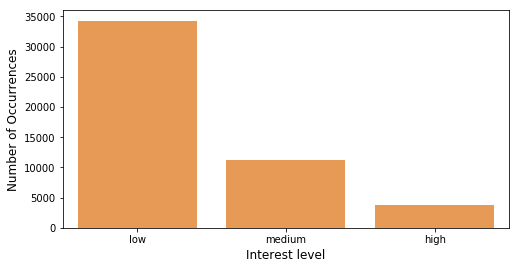

In [4]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


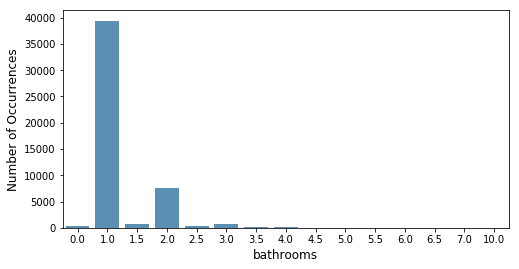

In [5]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


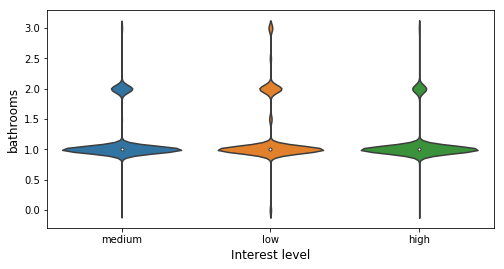

In [6]:
train_df['bathrooms'].loc[train_df['bathrooms']>3] = 3
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


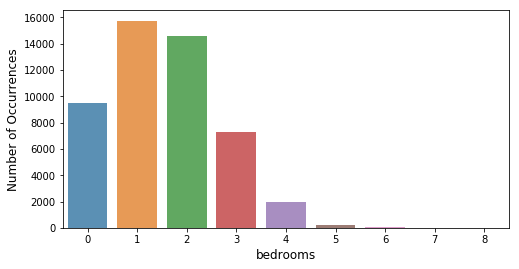

In [7]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


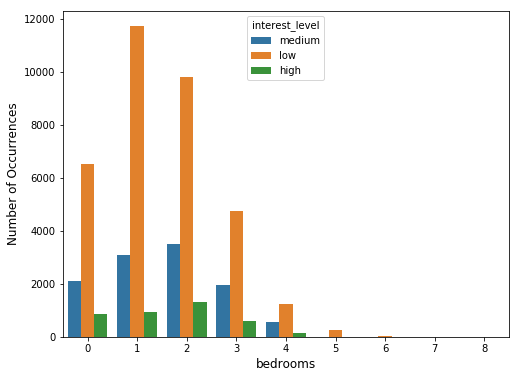

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

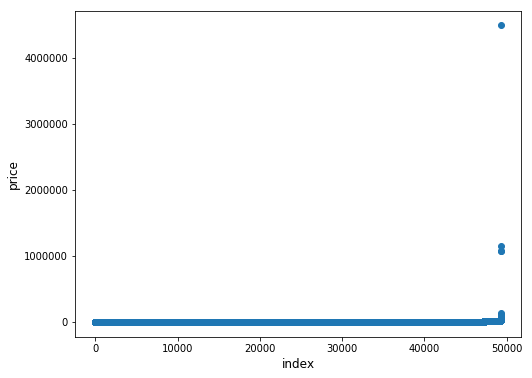

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


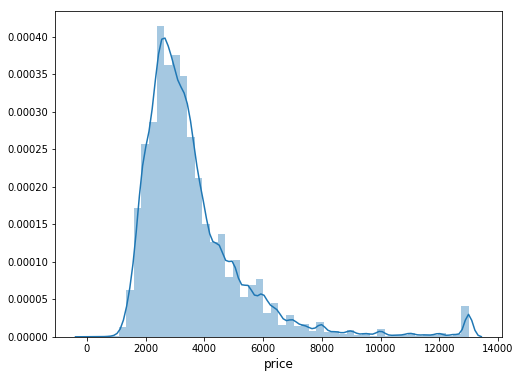

In [10]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

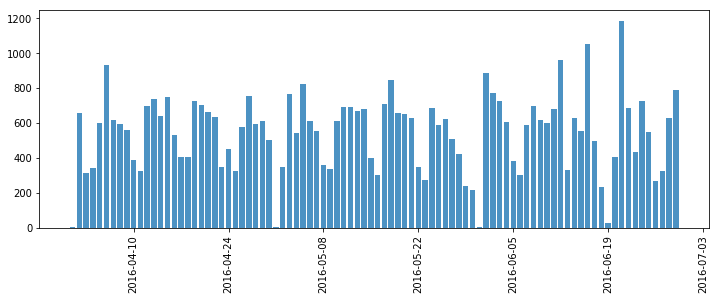

In [11]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
cnt_srs = train_df['date_created'].value_counts()


plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


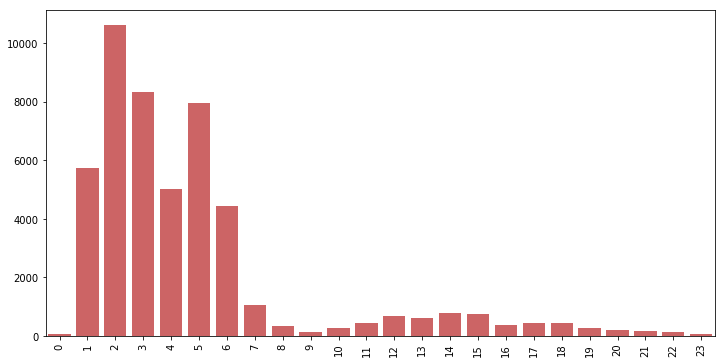

In [12]:
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


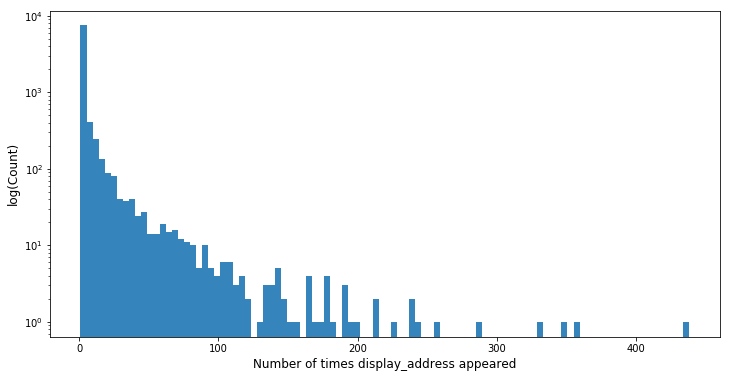

In [13]:
cnt_srs = train_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


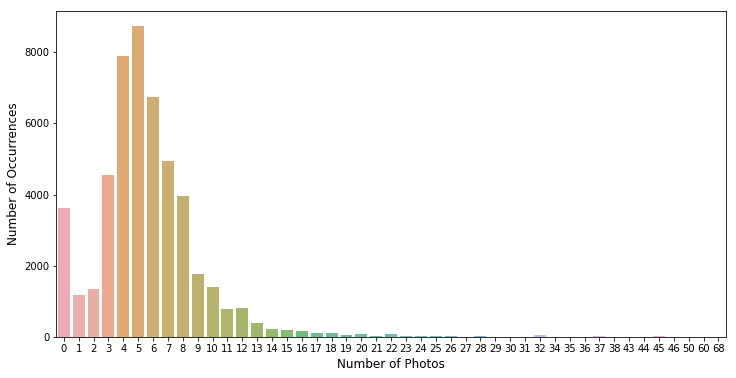

In [14]:
train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


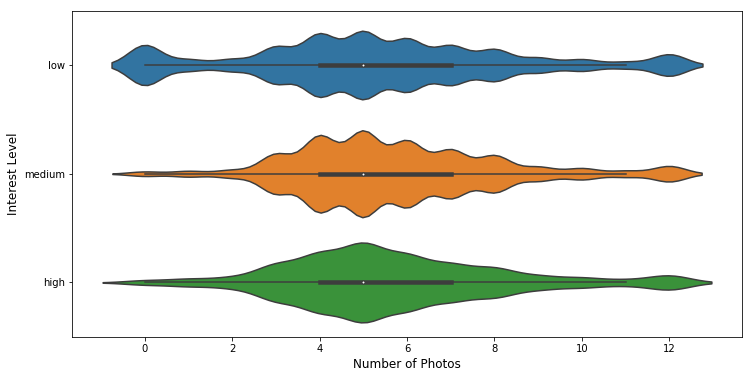

In [15]:
train_df['num_photos'].loc[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


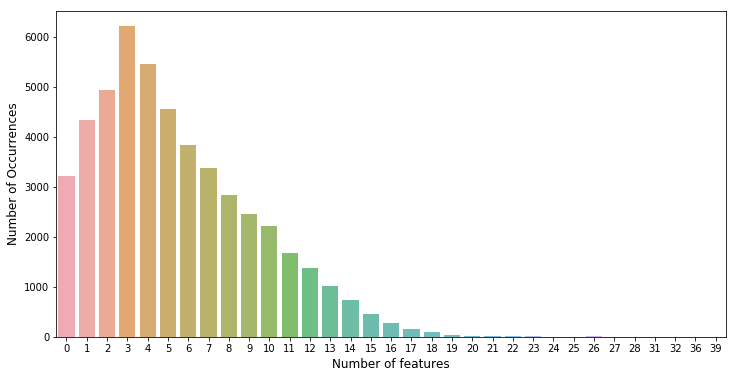

In [16]:
train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

In [17]:
# from wordcloud import WordCloud

# text = ''
# text_da = ''
# text_desc = ''
# for ind, row in train_df.iterrows():
#     for feature in row['features']:
#         text = " ".join([text, "_".join(feature.strip().split(" "))])
#     text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
#     #text_desc = " ".join([text_desc, row['description']])
# text = text.strip()
# text_da = text_da.strip()
# text_desc = text_desc.strip()

# plt.figure(figsize=(12,6))
# wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
# wordcloud.recolor(random_state=0)
# plt.imshow(wordcloud)
# plt.title("Wordcloud for features", fontsize=30)
# plt.axis("off")
# plt.show()

# # wordcloud for display address
# plt.figure(figsize=(12,6))
# wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
# wordcloud.recolor(random_state=0)
# plt.imshow(wordcloud)
# plt.title("Wordcloud for Display Address", fontsize=30)
# plt.axis("off")
# plt.show()

In [18]:
feats.most_common()

NameError: name 'feats' is not defined

In [ ]:
high = train_df.loc[train_df['interest_level'] == "high"]
med = train_df.loc[train_df['interest_level'] == "medium"]
low = train_df.loc[train_df['interest_level'] == "low"]



sns.kdeplot(high.price.values, color="green", shade=True)
sns.kdeplot(med.price.values, color = "yellow",shade=True)
sns.kdeplot(low.price.values, color="blue",shade=True)

plt.xlabel('price', fontsize=12)
plt.show()

## Manager Popularity

In [ ]:
manager_popularity = train_df.manager_id.value_counts()
num_owner_locations = [manager_popularity[x]
                       if x in manager_popularity
                       else 1
                       for x in train_df['manager_id']]

len(num_owner_locations)






## Building Popularity

In [ ]:
building_popularity = train_df.building_id.value_counts()
num_listings_building = [building_popularity[x]
                       if x in x!='0' and x in building_popularity
                       else 0
                       for x in train_df['building_id']]


## Number of photos

In [ ]:
num_photos = train_df.apply(lambda x: len(x['photos']), axis=1)

## Number of features

In [ ]:
num_features = train_df.apply(lambda x: len(x['features']), axis=1)

## Description length


In [ ]:
description_len = train_df.apply(lambda x: len(x['description']), axis=1)

## Age of listing

In [ ]:
earliest = max(train_df['date_created'])
age = train_df.apply(lambda x: (earliest-x['date_created']), axis=1)

## Features

In [19]:
from collections import Counter
feats = Counter()
for x in train_df['features']:
    for y in x:
        feats[y]+=1
feats.most_common()

[('Elevator', 25915),
 ('Cats Allowed', 23540),
 ('Hardwood Floors', 23527),
 ('Dogs Allowed', 22035),
 ('Doorman', 20898),
 ('Dishwasher', 20426),
 ('No Fee', 18062),
 ('Laundry in Building', 16344),
 ('Fitness Center', 13252),
 ('Pre-War', 9148),
 ('Laundry in Unit', 8738),
 ('Roof Deck', 6542),
 ('Outdoor Space', 5268),
 ('Dining Room', 5136),
 ('High Speed Internet', 4299),
 ('Balcony', 2992),
 ('Swimming Pool', 2730),
 ('Laundry In Building', 2593),
 ('New Construction', 2559),
 ('Terrace', 2283),
 ('Exclusive', 2167),
 ('Loft', 2100),
 ('Garden/Patio', 1943),
 ('Wheelchair Access', 1358),
 ('Common Outdoor Space', 1293),
 ('HARDWOOD', 914),
 ('Fireplace', 912),
 ('SIMPLEX', 908),
 ('prewar', 855),
 ('LOWRISE', 789),
 ('Garage', 745),
 ('Laundry Room', 719),
 ('Reduced Fee', 699),
 ('Laundry In Unit', 697),
 ('Furnished', 689),
 ('Multi-Level', 622),
 ('Private Outdoor Space', 508),
 ('Prewar', 494),
 ('PublicOutdoor', 423),
 ('Parking Space', 418),
 ('Roof-deck', 397),
 ('dishwas

In [179]:
def featureList(keyword,vector):
    index = 0
    newVec = pd.Series(0, index=np.arange(len(vector)))
    for row in vector:
        for item in row:
            if keyword in item.lower():
#                 print(row)
                newVec[index]=1
                index+=1
                break
    return newVec
                


In [192]:
cats = featureList('cats',train_df['features'])

dogs = featureList('dogs',train_df['features'])

hardwood = featureList('wood',train_df['features'])

prewar = featureList('pre war',train_df['features']).add(featureList('pre-war',train_df['features']))

terrace = featureList('terrace',train_df['features'])

patio = featureList('patio',train_df['features'])

parking = featureList('parking',train_df['features']).add(featureList('garage',train_df['features']))

roof = featureList('roof',train_df['features'])

pool = featureList('pool',train_df['features'])

gym = featureList('gym',train_df['features'])

kitchen = featureList('kitchen',train_df['features'])

parking = featureList('parking',train_df['features'])|(featureList('garage',train_df['features']))

doorman = featureList('doorman',train_df['features'])

dishwasher = featureList('dishwasher',train_df['features']).add(featureList('dish',train_df['features']))

laundry = featureList('laundry',train_df['features'])|(featureList('dryer',train_df['features']))

doorman = featureList('doorman',train_df['features'])

terrace = featureList('terrace',train_df['features'])

bike = featureList('bike',train_df['features'])|(featureList('bicycle',train_df['features']))

storage = featureList('storage',train_df['features'])

outdoor = featureList('outdoor',train_df['features'])

light = featureList('light',train_df['features'])

closet = featureList('closet',train_df['features'])

In [22]:
train_df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address', 'date_created', 'hour_created', 'num_photos',
       'num_features'],
      dtype='object')

In [23]:
dict(train_df.building_id.value_counts())


{'0': 8286,
 '96274288c84ddd7d5c5d8e425ee75027': 275,
 '11e1dec9d14b1a9e528386a2504b3afc': 215,
 '80a120d6bc3aba97f40fee8c2204524b': 213,
 'bb8658a3e432fb62a440615333376345': 212,
 'f68bf347f99df026f4faad43cc604048': 191,
 'c94301249b8c09429d329864d58e5b82': 167,
 'ce6d18bf3238e668b2bf23f4110b7b67': 165,
 '57ef86c28a8ae482dc3a3c3af28e8e48': 159,
 '128d4af0683efc5e1eded8dc8044d5e3': 153,
 'd0234abbc01a982d54e8d446acc03405': 152,
 '9c18bf871b97492b96d8ddb800591f1b': 147,
 'cb14c4f807f23ecee1f7469b5159d2de': 141,
 '8e3b8c607c3edcf3de131c24f0390179': 141,
 'ea9045106c4e1fe52853b6af941f1c69': 139,
 '7967a1280bf3f7644500fc79d2696b0e': 133,
 'a01c99eb2cfdde327e1691e17d6696ba': 131,
 '093f64f52a6e43ba5e8f12bec8200554': 128,
 '18f6eb16d2f3e9885cb4a5d0a40791c6': 127,
 '5565db9b7cba3603834c4aa6f2950960': 126,
 'dd7b281c0dbafc8b53575ab78cca75d4': 125,
 '3a956bd42c50f06ac84cf072fc514f5f': 123,
 '6ce872b483cfcbb32ea805604d44ef5f': 120,
 'ec12b4db154a9c75983f5e32edd93843': 116,
 '93cd24891f8423d45ac5

In [24]:
dict(train_df.manager_id.value_counts())



{'e6472c7237327dd3903b3d6f6a94515a': 2533,
 '6e5c10246156ae5bdcd9b487ca99d96a': 711,
 '8f5a9c893f6d602f4953fcc0b8e6e9b4': 410,
 '62b685cc0d876c3a1a51d63a0d6a8082': 402,
 'cb87dadbca78fad02b388dc9e8f25a5b': 373,
 '9df32cb8dda19d3222d66e69e258616b': 330,
 'b7de4cb395920136663132057fa89d84': 320,
 '2aa9bfa5f67ed9997ea341dee8a3a271': 316,
 'ad3d8ddc52c7e0859b5c6c7f7949c3bd': 305,
 'c9c33695ee2a2f818e9f1d8f7d1c4b39': 299,
 '1fb46c4a72bcf764ac35fc23f394760d': 289,
 'd2bce61e0e0079ebdc8c281e415e045b': 276,
 '5599e962719af3ccc2976855c2d5893c': 256,
 'aa9e353a6b43b125cbc89cb751090a9e': 246,
 '62826f3ae01f2ddc93b9cd28c659ab2b': 233,
 '8b53ccf4338806ab1be3dd0267711649': 222,
 '612a00076aefe8c98d1df4835640c74b': 214,
 'dbbb6b990661b1e507a387f019bcb1a0': 212,
 '8262449f40e9117f7a9ea49b4a333993': 210,
 'b209e2c4384a64cc307c26759ee0c651': 210,
 'fc81b75568d3655a922523cb0d77ea5b': 206,
 'd1737922fe92ccb0dc37ba85589e6415': 198,
 '1067e078446a7897d2da493d2f741316': 191,
 '501b52559fd21b32808030a0f4fb1a2

In [25]:
coords = train_df[['longitude','latitude']]

In [235]:
norm_coords = coords[(np.abs(stats.zscore(coords)) < .25 ).all(axis=1)]
print(len(norm_coords)-len(coords),"removed")


-130 removed


In [27]:
print(np.mean(norm_coords['latitude']))

40.75111699646531


In [28]:
kmeans = KMeans(n_clusters=20,random_state=1)
kmeans.fit(norm_coords)
predictions = kmeans.predict(norm_coords)

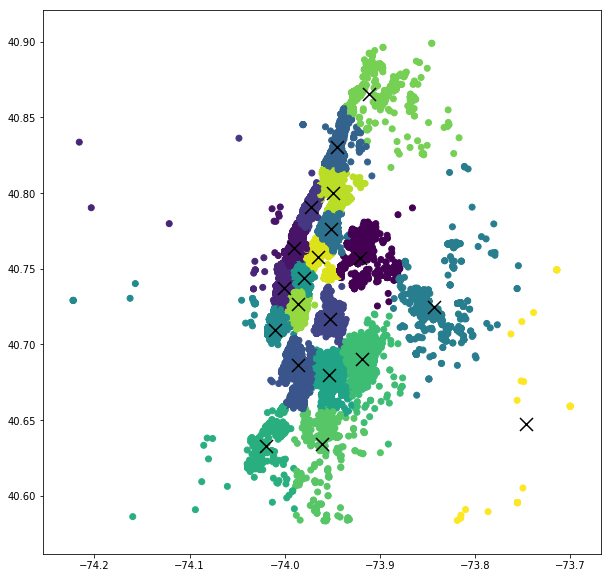

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(norm_coords['longitude'], norm_coords['latitude'], c=predictions)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=30,
            color='black')

In [30]:
train_df['district'] = kmeans.predict(coords)

## In Manhattan

In [31]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

nw = (40.883982, -73.932266)
sw =  (40.706982, -74.032860)
se = (40.695009, -73.981361)
ne = (40.800089, -73.913040)
tip = (40.699434, -74.025650)
tip2 = (40.699174, -74.006081)
tip3 = (40.708804, -73.977585)
tip4 = (40.732482, -73.965569)
tip5 = (40.748090, -73.959732)
tip6 = (40.777215, -73.937416)
tip7 = (40.801648, -73.925057)
tip8= (40.873598, -73.904800)

manhattan = Polygon([nw, sw, tip, tip2, tip3, tip4, tip5, tip6, tip7, tip8])

In [32]:
norm_coords['pair'] = list(zip(norm_coords.latitude, norm_coords.longitude))
norm_coords["in_manhattan"] = np.array([1 if manhattan.contains(Point(x)) else 0
                                        for x in norm_coords['pair']])
len(norm_coords['in_manhattan'])

49222

## Outliers



## Price per bathroom


In [33]:
def bathroom_price(row):
    try: 
        x = row['price']/row['bathrooms']
        return x
    except:
        return row['price']
price_per_bathroom = train_df.apply(lambda row: bathroom_price(row),axis=1)
price_per_bathroom

10        2000.000000
10000     5465.000000
100004    2850.000000
100007    3275.000000
100013    3350.000000
100014    3997.500000
100016    3600.000000
100020    2822.500000
100026    1725.000000
100027    2900.000000
100030    1950.000000
10004     1675.000000
100044    3000.000000
100048    3447.500000
10005     3050.000000
100051    2350.000000
100052    3650.000000
100053    1695.000000
100055    5000.000000
100058    3973.000000
100062    4395.000000
100063    2999.000000
100065    2595.000000
100066    3695.000000
10007     3700.000000
100071    2500.000000
100075    2295.000000
100076    3164.000000
100079    1350.000000
100081    2800.000000
             ...     
99915     3126.000000
99917     3325.000000
99919     2100.000000
99921     3500.000000
99923     5975.000000
99924     2980.000000
99931     2850.000000
99933     2885.000000
99935     2950.000000
99937     1766.666667
9994      4850.000000
99953     3475.000000
99956     2907.500000
99960     2050.000000
99961     

## Price per bedroom

In [34]:
def bedroom_price(row):
    try: 
        x = row['price']/row['bedrooms']
        return x
    except:
        return row['price']
        
price_per_bedroom = train_df.apply(lambda row: bedroom_price (row),axis=1)
price_per_bedroom

10        1000.000000
10000     2732.500000
100004    2850.000000
100007    3275.000000
100013     837.500000
100014    1998.750000
100016    1800.000000
100020    5645.000000
100026    1725.000000
100027    1450.000000
100030    1950.000000
10004     1675.000000
100044    1500.000000
100048    3447.500000
10005     3050.000000
100051    2350.000000
100052    1825.000000
100053    1695.000000
100055    1250.000000
100058    3973.000000
100062    1465.000000
100063    1499.500000
100065    2595.000000
100066    3695.000000
10007     1850.000000
100071    1875.000000
100075    2295.000000
100076    3164.000000
100079    1350.000000
100081    2800.000000
             ...     
99915     3126.000000
99917     3325.000000
99919     2100.000000
99921     1750.000000
99923     5975.000000
99924     2980.000000
99931     2850.000000
99933     1442.500000
99935     2950.000000
99937     2650.000000
9994      2425.000000
99953     3475.000000
99956     2907.500000
99960     2050.000000
99961     